In [2]:
import numpy as np
from scipy import fftpack as fp
import matplotlib.pyplot as plt
from skimage import io, color, util
from helper import *

img1=io.imread('rektorat_ui.jpeg')
plt.imshow(img1);plt.axis("off");plt.show()
i1 = color.rgb2gray(img1)
w, l = paddedsize(i1.shape[0], i1.shape[1])
D0_1 = 0.1
D0_2 = 0.06
#
#
#
#
#Butterworth Lowpass Filter (BLPF) w/ D0 = 0.1
h1 = lpfilter('btw', w, l, D0_1 * w)

#Butterworth Lowpass Filter (BLPF) w/ D0 = .06
h2 = lpfilter('btw', w, l, D0_2 * w)

# menghitung DFT citra
f = fp.fft2(i1,(w,l))
# Apply lowpass filter
LPFS_rektorat1 = h1*f
LPFS_rektorat2 = h2*f

# convert ke domain spasial
LPF_rektorat1 = fp.ifft2(LPFS_rektorat1).real
LPF_rektorat1 = LPF_rektorat1[:i1.shape[0],:i1.shape[1]]

LPF_rektorat2 = fp.ifft2(LPFS_rektorat2).real
LPF_rektorat2 = LPF_rektorat2[:i1.shape[0],:i1.shape[1]]

# Menampilkan fourier spectrum
Fc = fp.fftshift(f)
Fcf1 = fp.fftshift(LPFS_rektorat1)
Fcf2 = fp.fftshift(LPFS_rektorat2)

# fungsi abs untuk menghitung magnitude
S1 = np.log(1+abs(Fc))
S2 = np.log(1+abs(Fcf1))
S3 = np.log(1+abs(Fcf2))

plt.subplot(); plt.imshow(i1, cmap='gray')
plt.title("Original"); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(S1, cmap='gray')
plt.title("Original Fourier Spectrum"); plt.axis("off")
plt.show()

plt.subplot(); plt.imshow(LPF_rektorat1, cmap='gray')
plt.title("Butterworth Lowpass Filter (BLPF) w/ D0 = 0.1"); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(S2, cmap='gray')
plt.title("Spectrum of Filtered Image"); plt.axis("off")
plt.show()

plt.subplot(); plt.imshow(LPF_rektorat2, cmap='gray')
plt.title("Butterworth Lowpass Filter (BLPF) w/ D0 = 0.06"); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(S3, cmap='gray')
plt.title("Spectrum of Filtered Image"); plt.axis("off")
plt.show()

#
#
#
#
#
#Butterworth Highpass Filter (BHPF) w/ D0 = 0.1
h3 = hpfilter('btw', w, l, D0_1 * w)

#Butterworth Highpass Filter (BHPF) w/ D0 = .06
h4 = hpfilter('btw', w, l, D0_2 * w)

# Apply highpass filter
HPFS_rektorat1 = h3*f
HPFS_rektorat2 = h4*f

# convert ke domain spasial
HPF_rektorat1 = fp.ifft2(HPFS_rektorat1).real
HPF_rektorat1 = HPF_rektorat1[:i1.shape[0],:i1.shape[1]]

HPF_rektorat2 = fp.ifft2(HPFS_rektorat2).real
HPF_rektorat2 = HPF_rektorat2[:i1.shape[0],:i1.shape[1]]

# Menampilkan fourier spectrum
Fcf3 = fp.fftshift(HPFS_rektorat1)
Fcf4 = fp.fftshift(HPFS_rektorat2)

# fungsi abs untuk menghitung magnitude
S4 = np.log(1+abs(Fcf3))
S5 = np.log(1+abs(Fcf4))

plt.subplot(); plt.imshow(HPF_rektorat1, cmap='gray')
plt.title("Butterworth Highpass Filter (BLPF) w/ D0 = 0.1"); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(S4, cmap='gray')
plt.title("Spectrum of Filtered Image"); plt.axis("off")
plt.show()

plt.subplot(); plt.imshow(HPF_rektorat2, cmap='gray')
plt.title("Butterworth Highpass Filter (BHPF) w/ D0 = 0.06"); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(S5, cmap='gray')
plt.title("Spectrum of Filtered Image"); plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

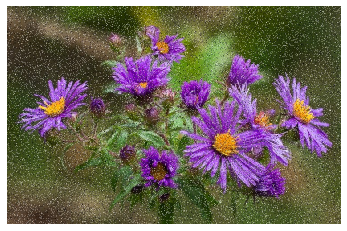

In [ ]:
img2=io.imread('flowers_noisy.jpg')
plt.imshow(img2);plt.axis("off");plt.show()

w, l = paddedsize(img2.shape[0],img2.shape[1])
F = fp.fft2(util.img_as_float(img2),(w,l))
Fc = fp.fftshift(F)
S1 = np.log(1+abs(Fc))
plt.subplot(1,2,1); plt.imshow(img2, cmap='gray')
plt.title('Noisy Image'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(S1, cmap='gray')
plt.title('Fourier Spectrum of Noisy Image'); plt.axis("off")
plt.show()

# fungsi notch terdapat pada file helper.py
H1 = notch('btw', w, l, 10, 50, 100)
H2 = notch('btw', w, l, 10, 1, 400)
H3 = notch('btw', w, l, 10, 620, 100)
H4 = notch('btw', w, l, 10, 22, 414)
H5 = notch('btw', w, l, 10, 592, 414)
H6 = notch('btw', w, l, 10, 1, 114)
FS_football = F*H1*H2*H3*H4*H5*H6
F_football = fp.ifft2(FS_football).real
F_football = F_football[:img2.shape[0],:img2.shape[1]]
Fcf = fp.fftshift(FS_football)
S2 = np.log(1+abs(Fcf))
plt.subplot(1,2,1); plt.imshow(F_football, cmap='gray')
plt.title('Filtered Image'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(S2, cmap='gray')
plt.title('Fourier Spectrum After Filter'); plt.axis("off")
plt.show()